In [140]:
import pandas as pd

train_data = pd.read_csv('datasets/titanic/train.csv')
test_data = pd.read_csv('datasets/titanic/test.csv')

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [141]:
# cabin has too many missing values
# impute age with mean
# name and ticket number difficult to make use of for the model
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
# close to 50% survived -> accuracy is a good measurement
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [143]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [144]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [145]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [146]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

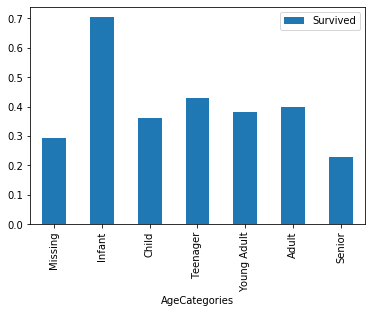

In [147]:
# transform age into categorical attribute

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["AgeCategories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train_data = process_age(train_data,cut_points,label_names)
test_data = process_age(test_data,cut_points,label_names)

pivot = train_data.pivot_table(index="AgeCategories",values='Survived')
pivot.plot.bar()
plt.show()

In [148]:
train_data["RelativesOnboard"] = train_data['SibSp'] + train_data['Parch'] 
test_data["RelativesOnboard"] = test_data['SibSp'] + test_data['Parch']

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeCategories  \
0      0         A/5 21171   7.2500   NaN        S   Young Adult   
1      0          PC 17599  71.2833   C85        C         Adult   
2      0  STON/O2. 3101282   7.9250   NaN        S   Young Adult   
3      0            113803  53.1000  C123        S   Young Adult   
4      0            373450   8.0500   NaN        S   Young Adult   

   RelativesOnboard  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0

In [149]:
train_data[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard']).mean()

Survived
RelativesOnboard          
0                 0.303538
1                 0.552795
2                 0.578431
3                 0.724138
4                 0.200000
5                 0.136364
6                 0.333333
7                 0.000000
10                0.000000

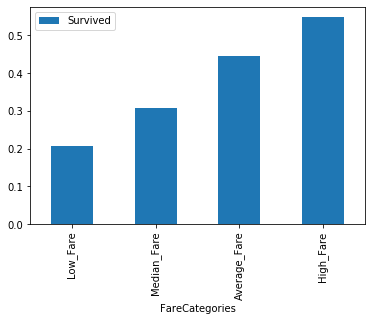

In [151]:
# transform age into categorical attribute

def process_fare(df,cut_points,label_names):
    df["Fare"] = df["Fare"].fillna(-0.5)
    df["FareCategories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

cut_points = [0, 7.91, 14.45, 31, 120]
label_names = ['Low_Fare', 'Median_Fare', 'Average_Fare', 'High_Fare']
train_data = process_fare(train_data,cut_points,label_names)
test_data = process_fare(test_data,cut_points,label_names)

train_data
pivot = train_data.pivot_table(index="FareCategories",values='Survived')
pivot.plot.bar()
plt.show()

In [152]:
# create feature set and labels
passengers = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
passengers_labels = train_data['Survived'].copy()

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

num_attribs = ['RelativesOnboard']
cat_attribs = ['Pclass', 'Sex', 'Embarked', 'AgeCategories', 'FareCategories']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

passengers_prepared = full_pipeline.fit_transform(passengers)

In [155]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, passengers_prepared, passengers_labels, cv=10)
svm_scores.mean()

0.8136528203382136

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, passengers_prepared, passengers_labels, cv=10)
forest_scores.mean()

0.8283605720122574

In [158]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr_scores = cross_val_score(lr, passengers_prepared, passengers_labels, cv=10)
lr_scores.mean()

0.8092841334695269

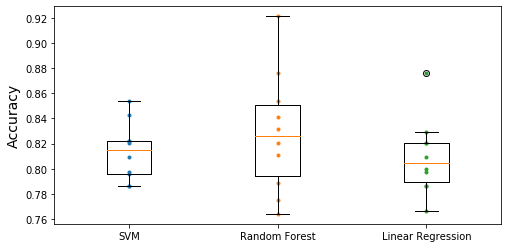

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, lr_scores, ".")
plt.boxplot([svm_scores, forest_scores, lr_scores], labels=("SVM","Random Forest", "Linear Regression"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [165]:
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
#n_estim=range(100,1000,100)

## Search grid for optimal parameters
#param_grid = {"n_estimators" :n_estim}

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_rf.fit(passengers_prepared, passengers_labels)

#best estimator
bestModel = model_rf.best_estimator_
best_scores = cross_val_score(bestModel, passengers_prepared, passengers_labels, cv=10)
best_scores.mean()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done 2500 out of 2500 | elapsed:  8.1min finished


0.8294713993871298

In [168]:
round(bestModel.score(passengers_prepared, passengers_labels) * 100, 2)

88.1

In [173]:
test_data_prepared = test_data.drop(['Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
test_data_prepared = full_pipeline.fit_transform(test_data_prepared)
predictions = bestModel.predict(test_data_prepared)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [174]:
submission.to_csv('titanic_predictions.csv', index=False)